# Data Analysis Notebook

Welcome to our data analysis notebook! In this notebook, we are on a journey to uncover insights from the historic SNCF train delay dataset. Our mission is to understand the dataset thoroughly, identify the useful dimensions for prediction tasks, and develop effective strategies for predicting average arrival delays and the causes behind these delays.

## Goals
- **Understand the Dataset:** Explore the dataset's structure and characteristics.
- **Identify Useful Dimensions:** Define which dimensions are valuable for prediction tasks.
- **Define possible prediction approaches:** Define viable approaches for predicting arrival delays and the causes.

## Context 
This dataset provides historical information about SNCF train delays. The data includes numeric features such as `nb_train_prevu`, `nb_annulation`, `retard_moyen_depart`, and `nb_train_retard_arrivee`. The information is aggregated monthly from 2018 to 2023 and categorized by itineraries (e.g., PARIS - LYON).

## Steps to Achieve Our Goals
1. **Data Exploration:**
   - Examine the dataset's structure.
   - Identify key features and target variables.
<br/>
<br/>

2. **Exploratory Data Analysis (EDA):**
   - Visualize data distributions.
   - Explore correlations between variables.
<br/>
<br/>

3. **Deep Dive Exploration:**
   - Investigate possible seasonality in delay metrics.
   - Identify general trends in delay metrics (increasing or decreasing averages).
   - Study the impact of Covid on the data.
   - Explore potential relationships between various dimensions.
<br/>
<br/>

4. **Feature Selection and Possible Approaches:**
   - Identify relevant features for prediction.
   - List potential approaches to succeed in the prediction task based on our analysis.
<br/>
<br/>


Let's embark on this exciting analytical journey and uncover valuable insights from the data!


In [11]:
# Import usefull libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [12]:
# Path to the data
path = "/Users/danielrodriguez/Desktop/"

In [13]:
# Import data
data_tgv = pd.read_csv(path + "projet-ML-CS/data/preprocessed_tgv_data.csv",sep=";")

## 1. Data Exploration

In [14]:
display(data_tgv.columns)

Index(['date', 'service', 'gare_depart', 'gare_arrivee', 'duree_moyenne',
       'nb_train_prevu', 'nb_annulation', 'nb_train_depart_retard',
       'retard_moyen_depart', 'retard_moyen_tous_trains_depart',
       'nb_train_retard_arrivee', 'retard_moyen_arrivee',
       'retard_moyen_tous_trains_arrivee', 'nb_train_retard_sup_15',
       'retard_moyen_trains_retard_sup15', 'nb_train_retard_sup_30',
       'nb_train_retard_sup_60', 'prct_cause_externe', 'prct_cause_infra',
       'prct_cause_gestion_trafic', 'prct_cause_materiel_roulant',
       'prct_cause_gestion_gare', 'prct_cause_prise_en_charge_voyageurs',
       'duree_standard'],
      dtype='object')

In [15]:
pd.set_option('display.max_columns', None)
display(data_tgv.head())

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,nb_train_retard_arrivee,retard_moyen_arrivee,retard_moyen_tous_trains_arrivee,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs,duree_standard
0,2018-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141.0,870.0,5.0,289.0,11.247809,3.693179,147.0,28.436735,6.511118,110.0,6.511118,44.0,8.0,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336,136.0
1,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165.0,222.0,0.0,8.0,2.875000,0.095796,34.0,21.524020,5.696096,22.0,5.696096,5.0,0.0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000,167.0
2,2018-01,National,PARIS MONTPARNASSE,QUIMPER,220.0,248.0,1.0,37.0,9.501351,1.003981,26.0,55.692308,7.578947,26.0,7.548387,17.0,7.0,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000,219.0
3,2018-01,National,PARIS MONTPARNASSE,ST MALO,156.0,102.0,0.0,12.0,19.912500,1.966667,13.0,48.623077,6.790686,8.0,6.724757,6.0,4.0,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000,154.0
4,2018-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61.0,391.0,2.0,61.0,7.796995,0.886889,71.0,12.405164,3.346487,17.0,3.346487,6.0,0.0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000,60.0


As we can see the data is grouped by moth (date) and itinerary (tupple of gare_depart and gare_arrivee).

Our target columns are : 
 - `retard_moyen_arrivee`
 - `prct_cause_infra`
 - `prct_cause_gestion_trafic`
 - `prct_cause_materiel_roulant`
 - `prct_cause_gestion_gare`
 - `prct_cause_prise_en_charge_voyageurs`

## 2. Exploratory Data Analysis

In [16]:
data = data_tgv.copy()

In [7]:
def plot_distribution(dimension:str,Y:pd.Series):
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.hist(Y, bins=50, color='gray', alpha=0.5)
    ax.set_title(f'Distribution of {dimension}')
    ax.set_xlabel(dimension)
    ax.set_ylabel('Frequency')
    plt.show()

    fig, ax = plt.subplots(figsize=(10, 4))
    ax.boxplot(Y)
    ax.set_title(f'Box plot of {dimension}')
    ax.set_xlabel(dimension)
    ax.set_ylabel('Value')
    plt.show()

    display(Y.describe())

Let's plot the distribution of our target variable `retard_moyen_arrivee`

To be able to compare this variable accros different itineraries we have to normalized by dividing by `duree_standard`

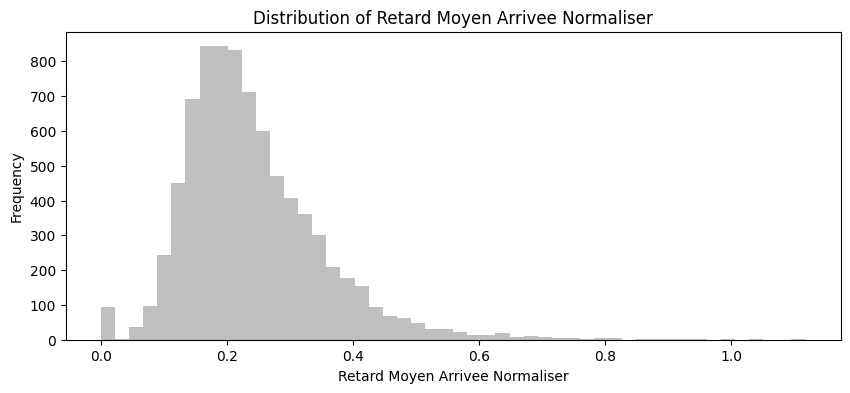

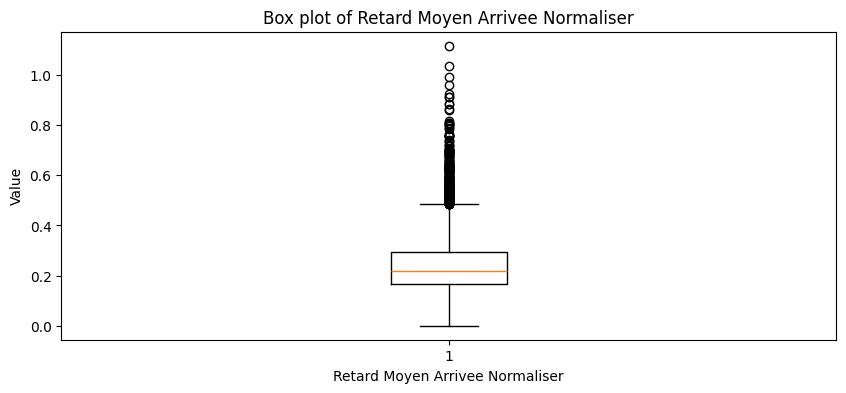

count    7986.000000
mean        0.240428
std         0.111146
min         0.000000
25%         0.166888
50%         0.219532
75%         0.294257
max         1.117322
dtype: float64

In [32]:
plot_distribution('Retard Moyen Arrivee Normaliser',data['retard_moyen_arrivee'] / data['duree_standard'])

**Observations:**

We have a khi 2 distribution with a standard deviation of 0.1 and a mean of 0.23. The data is well distributed but we can see we have many "outliers" (using 1.5*Q3). This is coherent, in train delays there are always exceptional events.


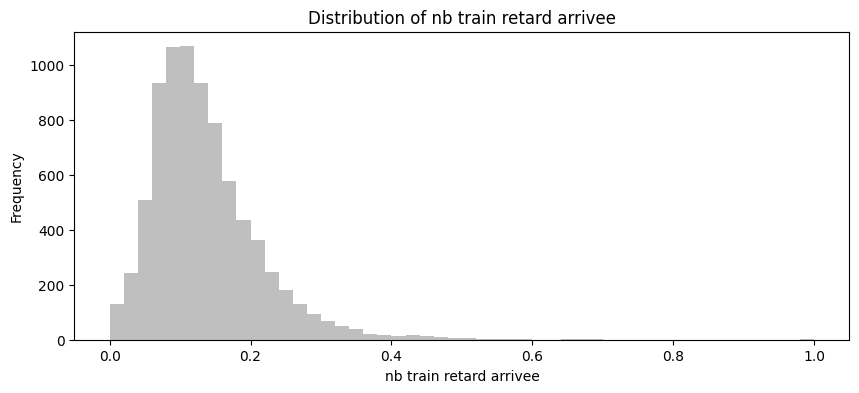

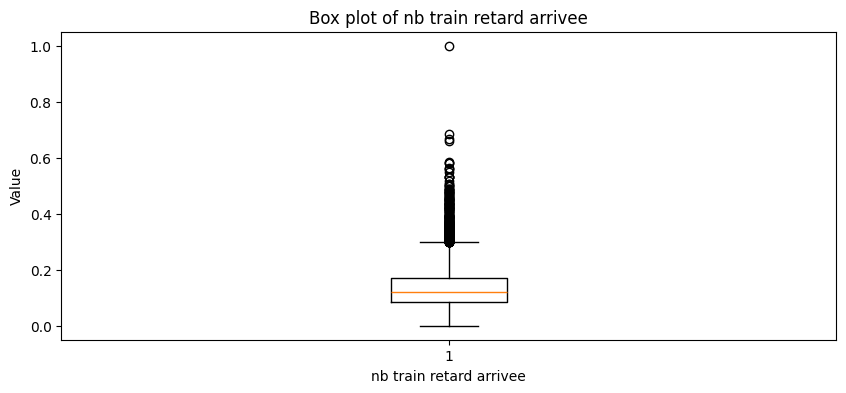

count    7986.000000
mean        0.135101
std         0.076609
min         0.000000
25%         0.083333
50%         0.120690
75%         0.169078
max         1.000000
dtype: float64

In [18]:
plot_distribution("nb train retard arrivee",data['nb_train_retard_arrivee'] / data['nb_train_prevu'])

**Observations :**

We see the same kind of distribution for the `retard_moyen_arrivee`. 

One question we asked ourselves was, when a train is delayed at the departure and it arrives late at the destination, does we count it on the delayed trains at arrival and on the delayed trains at the departure, or only on the delayed trains at the departure ?
In order to answer this question quickly we can simply study `retard_moyen_arrivee` / `retard_moyen_depart` and see if this values are always superior to 1. This will not provide us with a straight answer, but it can help our intuition.

In [21]:
m = data['retard_moyen_depart']!=0
(data[m]['retard_moyen_arrivee'] / data[m]['retard_moyen_depart']).describe()

count    7956.000000
mean        5.198852
std         6.204325
min         0.000000
25%         2.254781
50%         3.325985
75%         5.759163
max       122.166666
dtype: float64

**Observations :**

As we can see on the statistics, this value is almost always above 1, so probably the set trains delayed at the desparture is in the set of trains late at the arrival. So the metric `retard_moyen_arrivee` must be linked in this way to the `retard_moyen_depart`

In [24]:
counting_dates = data.groupby(["gare_depart","gare_arrivee"]).count()[["date"]].reset_index()
display(counting_dates.head())
print("Number of itineraries :",len(counting_dates))
print("Number of itineraries with 66 dates : ",sum(counting_dates["date"]==66))

,gare_depart,gare_arrivee,date
0,AIX EN PROVENCE TGV,PARIS LYON,66
1,ANGERS SAINT LAUD,PARIS MONTPARNASSE,66
2,ANGOULEME,PARIS MONTPARNASSE,66
3,ANNECY,PARIS LYON,66
4,ARRAS,PARIS NORD,66


Number of itineraries : 121
Number of itineraries with 66 dates :  121


We have a total of 121 itineraries and 66 dates per itinerary. 

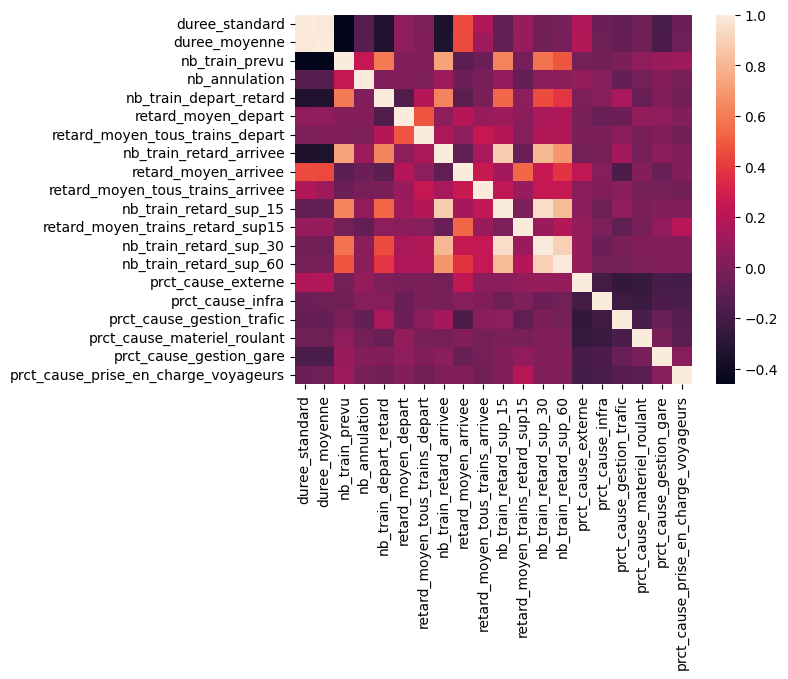

In [33]:
numeric_columns = ['duree_standard','duree_moyenne','nb_train_prevu', 'nb_annulation', 'nb_train_depart_retard', 'retard_moyen_depart','retard_moyen_tous_trains_depart', 'nb_train_retard_arrivee', 'retard_moyen_arrivee','retard_moyen_tous_trains_arrivee', 'nb_train_retard_sup_15', 'retard_moyen_trains_retard_sup15','nb_train_retard_sup_30', 'nb_train_retard_sup_60','prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic','prct_cause_materiel_roulant', 'prct_cause_gestion_gare','prct_cause_prise_en_charge_voyageurs']

# Compute correlation matrix of the data 
corr_mat = data[numeric_columns].corr()
sn.heatmap(corr_mat, annot=False,)
plt.show()

**Observations :**

One obvious observation is that the group of `pcrt_cause` are correlated between them and not very much with the rest of the features

In [34]:
# Change the value of dim to see the correlations to the target dimensions:
#     "retard_moyen_arrivee",
#     "prct_cause_externe",
#     "prct_cause_infra",
#     "prct_cause_gestion_trafic",
#     "prct_cause_materiel_roulant",
#     "prct_cause_gestion_gare",
#     "prct_cause_prise_en_charge_voyageurs",

dim = "retard_moyen_arrivee"
print(f" ############## {dim} ############## ")
display(corr_mat[dim].sort_values(key=lambda x:-abs(x)))

 ############## retard_moyen_arrivee ############## 


retard_moyen_arrivee                    1.000000
retard_moyen_trains_retard_sup15        0.537176
duree_standard                          0.447194
duree_moyenne                           0.442324
nb_train_retard_sup_60                  0.373396
nb_train_retard_sup_30                  0.254810
retard_moyen_tous_trains_arrivee        0.252444
prct_cause_externe                      0.229602
retard_moyen_depart                     0.187269
prct_cause_gestion_trafic              -0.167047
nb_train_retard_sup_15                  0.131308
nb_train_prevu                         -0.116275
nb_train_depart_retard                 -0.114782
nb_train_retard_arrivee                -0.097959
prct_cause_gestion_gare                -0.068308
retard_moyen_tous_trains_depart         0.058123
nb_annulation                          -0.056776
prct_cause_infra                        0.033936
prct_cause_materiel_roulant             0.026781
prct_cause_prise_en_charge_voyageurs    0.021896
Name: retard_moyen_a

**Observations :**

The previous analysis show that the most related variables to `retard_moyen_arrivee` are:
- `duree_moyenne`
- `nb_train_retard_sup_60`
- `retard_moyen_trains_retard_sup15`
- `nb_train_retard_sup_30`
- `prct_cause_gestion_trafic`
- `prct_cause_externe`

Based on this results, the dimensions we should consider for the prediction of `retard_moyen_arrivee` are the history of all the `prct_cause` dimensions (except one because we have the last one can be computed from the others ) ,`retard_moyen_arrivee`, `duree_moyenne` , `nb_train_retard_sup_60`,`retard_moyen_trains_retard_sup15` and `nb_train_retard_sup_30`. All of this dimensions are coherent, they are clearly related to the `retard_moyen_arrivee`.

Then for each one of the `prct_cause` we have to predict, we always found the other 5 `prct_cause` on the top correlated dimensions. This was expected, but then for each one of them we will have other specific metrics strogly correlated. 

For `prct_cause_externe`, we have :
- `retard_moyen_arrivee`
- `duree_moyenne`
This is normal because `une cause externe` will increase the `retard_moyen_arrivee` so the `duree_moyenne` too

For `prct_cause_infra`, we have:
- `nb_train_prevu`
This is coherent, if the are issue with the infrastructure they will plan less trains 

For `prct_cause_gestion_trafic`, we have all the delay metrics impacted, as well as the average duration:
- `duree_moyenne`
- `retard_moyen_arrivee`
- `nb_train_depart_retard`
- `nb_train_retard_arrivee`

For `prct_cause_materiel_roulant` it seems that only the departure delays is correlated:
- `nb_train_depart_retard`
- `retard_moyen_depart`   

For `prct_cause_prise_en_charge_voyageurs`, the most correlated dimension is `retard_moyen_trains_retard_sup15`, this is expected given the fact an passenger that need to be taken care of ussually implies a delay of more than 15 minutes.

Finally `prct_cause_gestion_gare` has a very different top correlated dimensions.


## 3. Data Deep Dive

Let's look at some specific itineraries to see the evolution of the `retard_moyen_arrivee` accross time.

In [28]:
def plot_metric_against_data(df:pd.DataFrame):
    plt.figure(figsize=(15, 6))
    plotted_dims = []
    for dim in df.columns:
        if dim != "date":
            plt.plot(df['date'], df[dim], marker='.', linestyle='-', label=dim)
            plotted_dims.append(dim)
    plt.title(f'{plotted_dims} vs Date')
    plt.xlabel('Date')
    plt.ylabel(f'{plotted_dims}') 
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)  
    plt.tight_layout()
    plt.show()

In [29]:
data["date"]=pd.to_datetime(data["date"])
itineray = ('PARIS MONTPARNASSE','TOULOUSE MATABIAU')
filtered_data = data[(data["gare_depart"]==itineray[0])*(data["gare_arrivee"]==itineray[1])].copy()


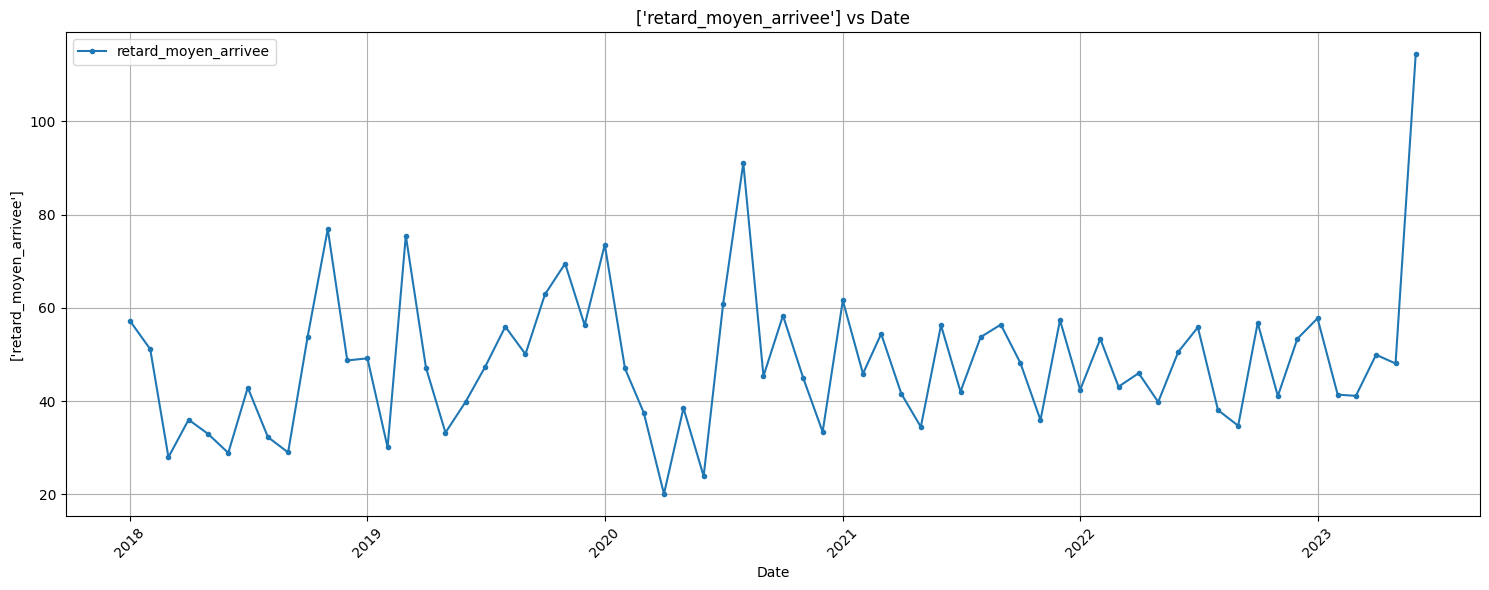

In [30]:
plot_metric_against_data(filtered_data[["date","retard_moyen_arrivee"]])

**Observations :**

By looking at the evolution of the delay across time, we can say with conviction that there is no saisonality for specific itineraries. The possible patters are not obvious at all, so we can already supose it will be very hard to predict the `retard_moyen_arrive` only using this history of this metric, we need for sure to use to other informations we have. Maybe if we compute the average of delay per month we could find some seasonability.


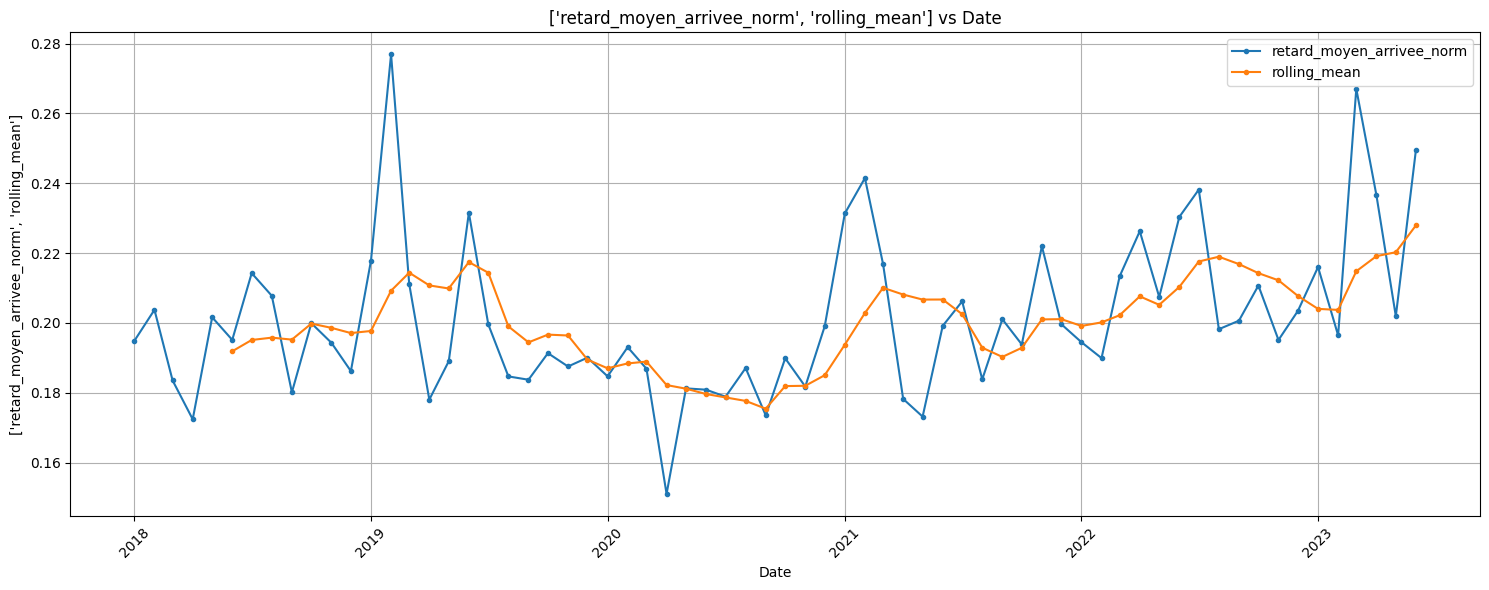

In [31]:
avg_per_month = data.groupby("date").mean(numeric_only=True).reset_index()
avg_per_month["retard_moyen_arrivee_norm"] = avg_per_month["retard_moyen_arrivee"] / avg_per_month["duree_moyenne"]
avg_per_month["rolling_mean"] = avg_per_month["retard_moyen_arrivee_norm"].rolling(window=6).mean()
plot_metric_against_data(avg_per_month[["date","retard_moyen_arrivee_norm","rolling_mean"]])

**Observations :**

- No obvious saisonality 
- We can see the drop point from covid period
- The rolling mean doesn't show any general trend.

In order to take into account the covid period, we could add a dummy variable. Maybe it could be interesting to add also dummy variables for christmas and summer, but there is no clear visible relation between these periods and an increase of the delays as it could be expected

The last question we can ask ourselves if is there is any straight relation between the features. The relations we identified are the following ones:
- `prct_cause_externe` + `prct_cause_gestion_trafic` + `prct_cause_materiel_roulant` + `prct_cause_prise_en_charge_voyageurs` + `prct_cause_gestion_gare` + `prct_cause_infra` = 1
- `retard_moyen_tous_trains_arrivee` = `retard_moyen_arrivee` * `nb_train_retard_arrivee`/ (`nb_train_prevu`-`nb_annulation`)
- `retard_moyen_tous_trains_depart` = `retard_moyen_depart` * `nb_train_depart_retard`/ (`nb_train_prevu`-`nb_annulation`)

In [64]:
(data["prct_cause_externe"] + data["prct_cause_gestion_trafic"] + data["prct_cause_materiel_roulant"] + data["prct_cause_prise_en_charge_voyageurs"] + data["prct_cause_gestion_gare"] + data["prct_cause_infra"]).describe()

count    3762.000000
mean       99.973418
std         1.630387
min         0.000000
25%       100.000000
50%       100.000000
75%       100.000000
max       100.000000
dtype: float64

In [62]:
(data["retard_moyen_tous_trains_arrivee"] /( data["retard_moyen_arrivee"] * data["nb_train_retard_arrivee"]/(data["nb_train_prevu"]-data["nb_annulation"]))).describe()

count    3762.000000
mean        1.152071
std         0.611332
min       -17.686619
25%         1.047549
50%         1.163134
75%         1.299121
max         7.188806
dtype: float64

In [63]:
(data["retard_moyen_tous_trains_depart"] /( data["retard_moyen_depart"] * data["nb_train_depart_retard"]/(data["nb_train_prevu"]-data["nb_annulation"]))).describe()

count    3762.000000
mean        0.897268
std         0.326562
min        -8.497803
25%         0.867140
50%         0.971071
75%         1.003207
max         1.839600
dtype: float64

In [67]:
data["retard_moyen_tous_trains_arrivee"].describe()

count    3762.000000
mean        4.870006
std         4.780670
min      -173.076970
25%         2.908890
50%         4.347662
75%         6.299340
max        83.388889
Name: retard_moyen_tous_trains_arrivee, dtype: float64

The first relation we established is true appart from some cases where all the percentages are 0
The second and third are not completely true, we can see the division between the two members of the equality is not far from 1 but this is not enough to conclude, they are related for sure but it's not as straight forward as we could think of. We can see sometimes we have negative values for `retard_moyen_tous_trains_arrivee` and `retard_moyen_tous_trains_depart` because the trains that arrive early are counted too but some of the values are too negative to be true.

## 4. Feature Selection and Possible Approaches

After this analysis there are two branchs for possible approaches:

The first one is to approache the prediction of the target values as a time-series situation. For the prediction of `retard_moyen_arrive` at month T we are going the past history (T-1, T-2 .... T-p) of the following dimensions (that are normalized thanks to `duree_standard`,`nb_train_prevu`):
- `duree_moyenne`/`duree_standard`,
- `retard_moyen_depart`/`duree_standard`
- `retard_moyen_arrivee`/`duree_standard`,
- `retard_moyen_tous_trains_arrivee`/`duree_standard`, 
- `retard_moyen_trains_retard_sup15`/`duree_standard`, 
- `nb_train_retard_sup_30`/`nb_train_prevu`,
- `nb_train_retard_sup_60`/`nb_train_prevu`, 

There are many questions that we can ask ourselves regarding this approach:
- How long should be the past window ? (value of p)
- Usually timeseries approaches are simple on the variable to predict, using multiple features would improve the performance?
- We have to predict the next 6 months so we have to apply a lag, how would this affect the model?
- The non historic features, mainly the departure and destination, how could they be taken into account in a time series approaches?
- Should we build one model per itinerary, or one model for all the itineraries ?
- Using 7 historic features with a past window of one year implies training models with 7*12 = 84 features... Should we try to reduce the dimensions using PCA or any other method?


Thanks to the analysis we can go for the modelling part and try to answer all of this questions
